# Image Thresholding

## Sample Images

In this section, we employ `Lunenburg.jpg` and `Varenna.jpg` from my personal image library. Both images were adjusted to a size of 2000 by 1500 to facilitate more straightforward calculations.

* [Lunenburg](https://en.wikipedia.org/wiki/Lunenburg,_Nova_Scotia) (a town in Nova Scotia, Canada) is known for its well-preserved colonial architecture and UNESCO World Heritage status.

* [Varenna](https://en.wikipedia.org/wiki/Varenna) features the picturesque village of Varenna on the shores of Lake Como, Italy, celebrated for its charming waterfront and stunning natural beauty.

In [ ]:
from skimage import io

Images = []
# Load an image from a URL
Names = ['Lunenburg', 'Varenna']
Urls = [f'https://raw.githubusercontent.com/HatefDastour/ENGG_680/main/Files/{name}.jpg' for name in Names]
Images = [io.imread(x) for x in Urls]

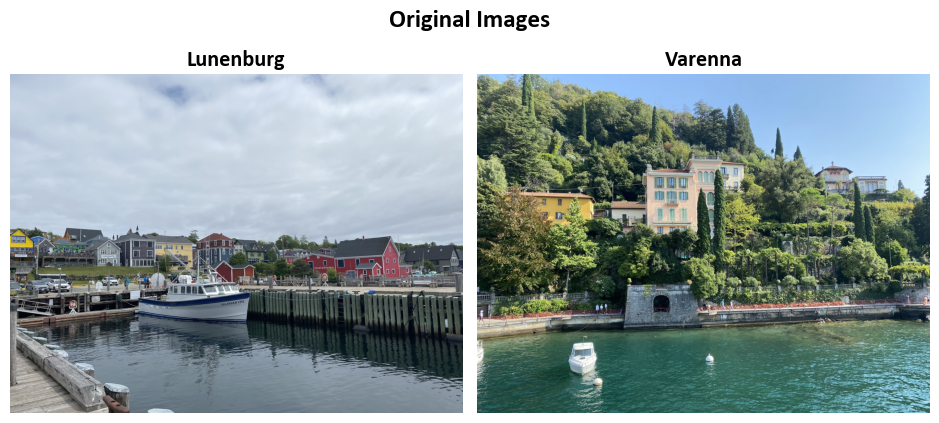

In [ ]:
# Import necessary libraries
import matplotlib.pyplot as plt  # Import the plotting library
from sklearn.datasets import load_sample_images  # Import a function to load sample images

# Set font properties for plots
plt.rcParams.update({'font.family': 'Calibri', 'axes.titlesize': 16})

# Define a function to display images with titles and optional settings
def ImShow(Images, Names, title='Images', grayscale=False, figsize=(9.5, 4.5)):
    # Create a figure with two subplots
    fig, ax = plt.subplots(1, 2, figsize= figsize)  # Create a figure with 1 row and 2 columns of subplots
    ax = ax.ravel()  # Flatten the subplots for easier manipulation

    # Iterate over the first two images
    for i in range(2):
        # Display the image in grayscale if grayscale is True, otherwise in color
        ax[i].imshow(Images[i], cmap='gray' if grayscale else None)
        ax[i].set_aspect(1)  # Set aspect ratio to 1 (square aspect)
        ax[i].axis('off')  # Turn off axis
        ax[i].set_title(Names[i], weight='bold')  # Set image title with bold font

    if title:
        # Set main title if provided
        fig.suptitle(title, weight='bold', fontsize=18)

    plt.tight_layout()  # Adjust layout for better spacing

    return fig, ax

# Display the original images
_, _ = ImShow(Images, Names, title='Original Images')  # Call the ImShow function to display images

## Simple Thresholding

The function "cv2.threshold" in Python is used to perform image thresholding, a common technique in image processing. Here's a refined description of the function {cite:p}`opencv_library, OpenCVDocumentation`:

```
cv2.threshold(src, thresh, maxval, type[, dst]) -> retval, dst
```

This function takes an input image (src) and applies a thresholding operation to it, producing a binary image. The thresholding operation involves comparing each pixel value in the source image to a specified threshold value (thresh). Pixels with values greater than or equal to the threshold are set to a specified maximum value (maxval), while pixels with values less than the threshold are set to zero (or a minimum value, depending on the type of thresholding specified). The resulting binary image is returned as the destination image (dst).

The function also returns two values: "retval," which is the threshold value used (this can be useful in adaptive thresholding), and "dst," the resulting thresholded image.

The "type" parameter determines the type of thresholding to be applied, and it can take one of the following values:
- cv2.THRESH_BINARY: Binary thresholding, where pixels above the threshold are set to maxval, and pixels below are set to zero.
- cv2.THRESH_BINARY_INV: Inverse binary thresholding, where pixels above the threshold are set to zero, and pixels below are set to maxval.
- cv2.THRESH_TRUNC: Truncated thresholding, where pixels above the threshold are set to the threshold value, and pixels below remain unchanged.
- cv2.THRESH_TOZERO: Thresholding to zero, where pixels above the threshold remain unchanged, and pixels below are set to zero.
- cv2.THRESH_TOZERO_INV: Inverse thresholding to zero, where pixels above the threshold are set to zero, and pixels below remain unchanged.

The optional "dst" parameter allows you to provide a pre-allocated output image to store the thresholded result. This parameter is useful when you want to reuse an existing image buffer instead of creating a new one.

### Binary Thresholding Image Transformation

In the context of image processing, "THRESH_BINARY" is a thresholding technique used to convert a grayscale image into a binary image. Here's how it works:

- For each pixel at position `(x, y)` in the source grayscale image:
  - If the pixel's intensity value at `(x, y)` is greater than a specified threshold value, the corresponding pixel in the output binary image is set to the maximum value (usually 255).
  - If the pixel's intensity value at `(x, y)` is less than or equal to the threshold value, the corresponding pixel in the output binary image is set to the minimum value (usually 0).

In mathematical terms, this can be expressed as:

\begin{equation}
\text{Output}(x, y) = \begin{cases}
\text{Maximum Value} & \text{if } \text{source}(x, y) > \text{Threshold Value} \\
0 & \text{otherwise}
\end{cases}
\end{equation}

This process effectively creates a binary image where pixels are classified into two categories based on their intensity: those above the threshold are set to the maximum value, and those below or equal to the threshold are set to the minimum value. This technique is commonly used for tasks such as object segmentation and feature extraction in computer vision and image analysis.

For more detailed information and examples, you can refer to the [OpenCV documentation on thresholding](https://docs.opencv.org/2.4/modules/imgproc/doc/miscellaneous_transformations.html?highlight=cv2.threshold#threshold).

<font color='Blue'><b>Example - Binary Thresholding Image Transformation</b></font>:

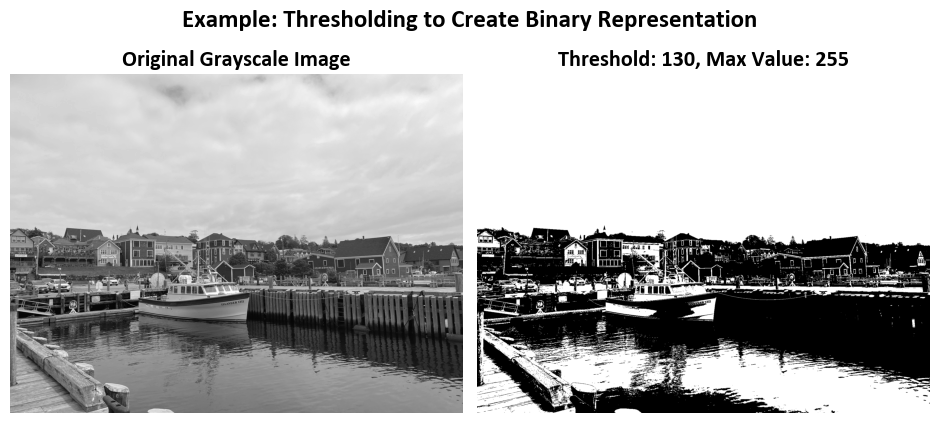

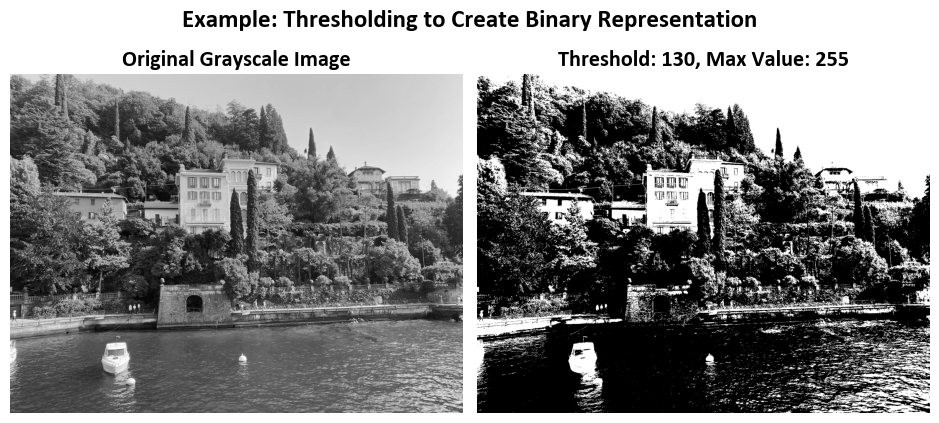

In [ ]:
import cv2
from sklearn.datasets import load_sample_image

for i in range(len(Images)):

    # Convert the color image to grayscale
    Img = cv2.cvtColor(Images[i], cv2.COLOR_BGR2GRAY)

    # Create a copy of the grayscale image
    Out = Img.copy()

    # Apply a binary threshold to the "Img" image
    # The threshold value is set to 130, and the maximum value after thresholding is 255
    # The result is stored in the "Out" image
    _, Out = cv2.threshold(Img, 130, 255, cv2.THRESH_BINARY)

    # Show both the original grayscale "Img" image and the thresholded "Out" image
    # Add titles to the images for clarity
    fig, ax = ImShow([Img, Out], ['Original Grayscale Image', 'Threshold: 130, Max Value: 255'],
                     title='Example: Thresholding to Create Binary Representation', grayscale=True)

### THRESH_BINARY_INV Thresholding

"THRESH_BINARY_INV" is a thresholding technique used in image processing to create a binary image from a grayscale image. In this technique:

- For each pixel at position `(x, y)` in the source grayscale image:
  - If the pixel's intensity value at `(x, y)` is greater than the specified threshold value, the corresponding pixel in the output binary image is set to 0 (usually 0).
  - If the pixel's intensity value at `(x, y)` is less than or equal to the threshold value, the corresponding pixel in the output binary image is set to the maximum value (often 255).

In mathematical terms, this can be expressed as:

\begin{equation}
\text{Output}(x, y) = \begin{cases}
0 & \text{if } \text{source}(x, y) > \text{Threshold Value} \\
\text{Maximum Value} & \text{otherwise}
\end{cases}
\end{equation}

In simple words, "THRESH_BINARY_INV" inverts the behavior of "THRESH_BINARY." It results in a binary image where pixels above the threshold become black, and pixels equal to or below the threshold become white. This thresholding technique is useful in various image processing tasks, such as object segmentation and feature extraction, where objects of interest are typically darker than their background.

For a complete description of this technique and its usage, you can refer to the OpenCV documentation on [thresholding](https://docs.opencv.org/2.4/modules/imgproc/doc/miscellaneous_transformations.html?highlight=cv2.threshold#threshold).

<font color='Blue'><b>Example - Inverse Binary Thresholding Image Transformation</b></font>:

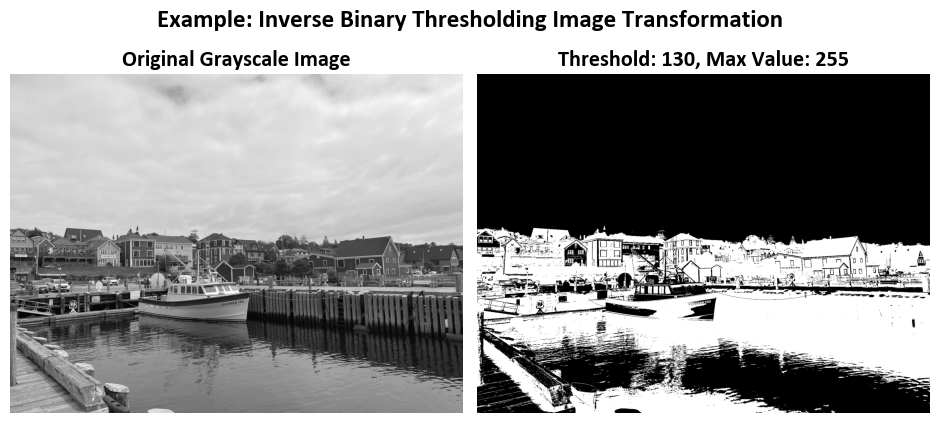

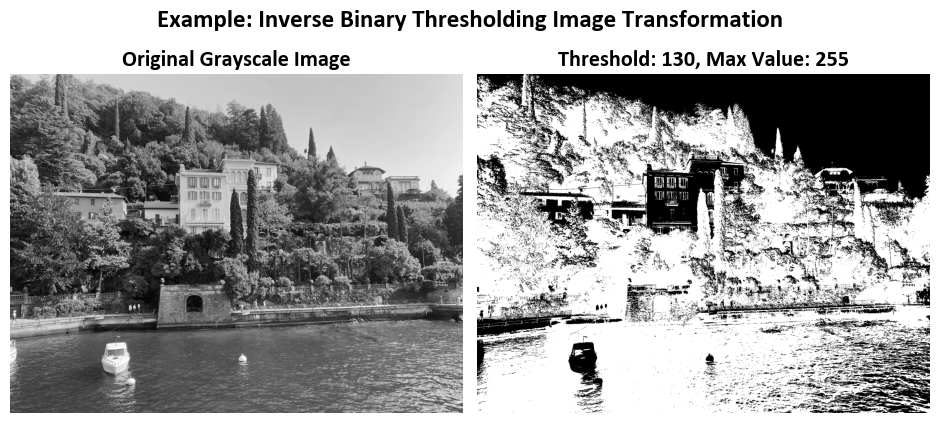

In [ ]:
import cv2
from sklearn.datasets import load_sample_image

for i in range(len(Images)):

    # Convert the color image to grayscale
    Img = cv2.cvtColor(Images[i], cv2.COLOR_BGR2GRAY)

    # Create a copy of the grayscale image
    Out = Img.copy()

    # Apply an inverse binary threshold to the "Img" image
    # The threshold value is set to 130
    # The maximum value after thresholding is set to 255
    # The specific thresholding type used is cv2.THRESH_BINARY_INV
    # The result is stored in the "Out" image
    _, Out = cv2.threshold(Img, 130, 255, cv2.THRESH_BINARY_INV)

    # Show both the original grayscale "Img" image and the thresholded "Out" image
    # Add titles to the images for clarity
    fig, ax = ImShow([Img, Out], ['Original Grayscale Image', 'Threshold: 130, Max Value: 255'],
                     title='Example: Inverse Binary Thresholding Image Transformation', grayscale= True)

### Truncate Thresholding

"THRESH_TRUNC" is a thresholding technique used in image processing to modify pixel values in a grayscale image based on a specified threshold value. In this technique:

- For each pixel at position `(x, y)` in the source grayscale image:
  - If the pixel's intensity value at `(x, y)` is greater than the specified threshold value, the corresponding pixel in the output image is set to the threshold value itself.
  - If the pixel's intensity value at `(x, y)` is less than or equal to the threshold value, the corresponding pixel in the output image retains its original intensity value from the source image.

In mathematical terms, this can be expressed as:

\begin{equation}
\text{Output}(x, y) = \begin{cases}
\text{Threshold Value} & \text{if } \text{source}(x, y) > \text{Threshold Value} \\
\text{source}(x, y) & \text{otherwise}
\end{cases}
\end{equation}

In simpler terms, "THRESH_TRUNC" modifies the pixel values such that any value in the source image above the threshold value is replaced with the threshold value, while values at or below the threshold remain unchanged. This thresholding technique can be used for various image enhancement and adjustment tasks in image processing.

For a comprehensive description and examples of "THRESH_TRUNC," you can refer to the OpenCV documentation on [thresholding](https://docs.opencv.org/2.4/modules/imgproc/doc/miscellaneous_transformations.html?highlight=cv2.threshold#threshold).

<font color='Blue'><b>Example - Truncate thresholding Image Transformation</b></font>:

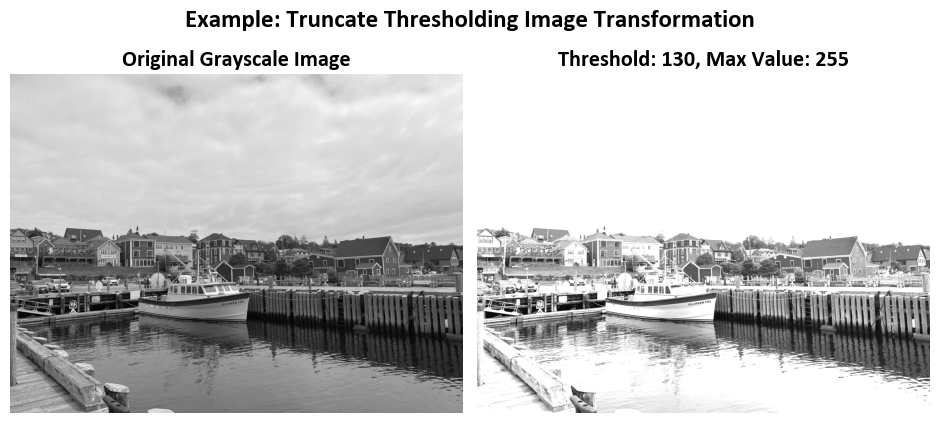

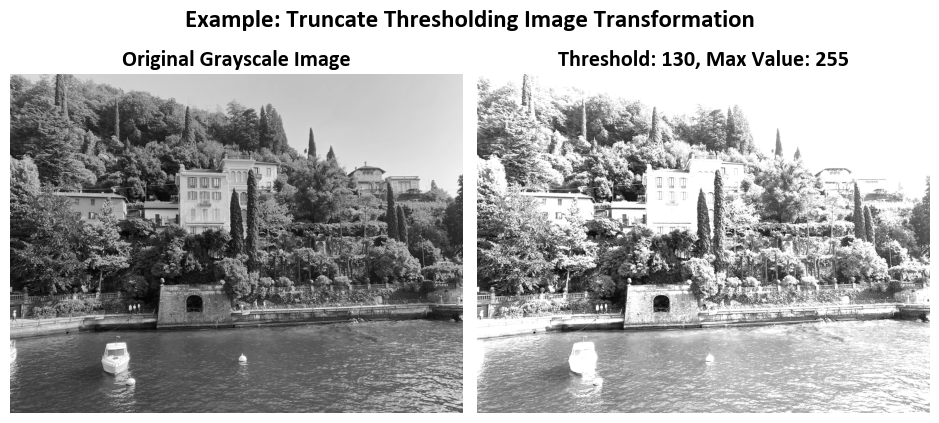

In [ ]:
import cv2
from sklearn.datasets import load_sample_image

for i in range(len(Images)):

    # Convert the color image to grayscale
    Img = cv2.cvtColor(Images[i], cv2.COLOR_BGR2GRAY)

    # Create a copy of the grayscale image
    Out = Img.copy()

    # Apply a thresholding operation to the "Img" image
    # The threshold value is set to 130
    # The maximum value after thresholding is set to 255
    # The thresholding type used is cv2.THRESH_TRUNC
    # The result is stored in the "Out" image
    _ , Out = cv2.threshold(Img, thresh=130, maxval=255, type=cv2.THRESH_TRUNC)

    # Show both the original grayscale "Img" image and the thresholded "Out" image
    # Add titles to the images for clarity
    fig, ax = ImShow([Img, Out], ['Original Grayscale Image', 'Threshold: 130, Max Value: 255'],
                     title='Example: Truncate Thresholding Image Transformation', grayscale= True)

### To-Zero Thresholding

"THRESH_TOZERO" is a thresholding technique used in image processing to modify pixel values in a grayscale image based on a specified threshold value. In this technique:

- For each pixel at position `(x, y)` in the source grayscale image:
  - If the pixel's intensity value at `(x, y)` is greater than the specified threshold value, the corresponding pixel in the output image retains its original intensity value from the source image.
  - If the pixel's intensity value at `(x, y)` is less than or equal to the threshold value, the corresponding pixel in the output image is set to 0.

In mathematical terms, this can be expressed as:

\begin{equation}
\text{Output}(x, y) = \begin{cases}
\text{source}(x, y) & \text{if } \text{source}(x, y) > \text{Threshold Value} \\
0 & \text{otherwise}
\end{cases}
\end{equation}


In simpler terms, "THRESH_TOZERO" modifies the pixel values such that any value in the source image above the threshold value is preserved as is, while values at or below the threshold are set to 0. This thresholding technique can be used for various image processing tasks, such as emphasizing regions of interest or reducing noise in images.

For a comprehensive description and examples of "THRESH_TOZERO," you can refer to the OpenCV documentation on [thresholding](https://docs.opencv.org/2.4/modules/imgproc/doc/miscellaneous_transformations.html?highlight=cv2.threshold#threshold).

<font color='Blue'><b>Example - To-Zero thresholding Image Transformation</b></font>:

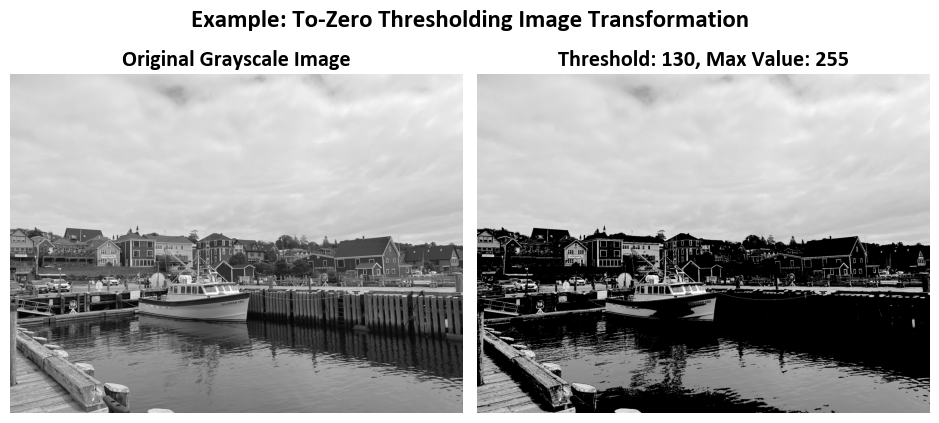

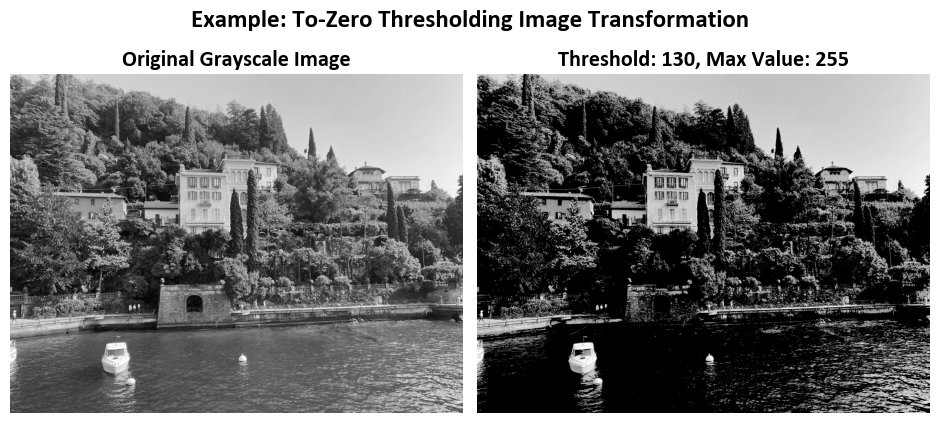

In [ ]:
import cv2
from sklearn.datasets import load_sample_image

for i in range(len(Images)):

    # Convert the color image to grayscale
    Img = cv2.cvtColor(Images[i], cv2.COLOR_BGR2GRAY)

    # Create a copy of the grayscale image
    Out = Img.copy()

    # Apply a thresholding operation to the "Img" image
    # The threshold value is set to 130
    # The maximum value after thresholding is set to 255
    # The thresholding type used is cv2.THRESH_TOZERO
    # The result is stored in the "Out" image
    _ , Out = cv2.threshold(Img, thresh=130, maxval=255, type=cv2.THRESH_TOZERO)

    # Show both the original grayscale "Img" image and the thresholded "Out" image
    # Add titles to the images for clarity
    fig, ax = ImShow([Img, Out], ['Original Grayscale Image', 'Threshold: 130, Max Value: 255'],
                     title='Example: To-Zero Thresholding Image Transformation', grayscale=True)


### Inverse To-Zero Thresholding

The `cv2.THRESH_TOZERO_INV` thresholding operation is a method used in image processing to modify pixel values in a grayscale image based on a predefined threshold value. It is part of the OpenCV library, a powerful tool for computer vision tasks. This specific thresholding operation follows the formula:

\begin{equation}
\text{Output}(x, y) = \begin{cases}
0 & \text{if } \text{source}(x, y) > \text{threshold value} \\
\text{source}(x, y) & \text{otherwise}
\end{cases}
\end{equation}

- For each pixel in the source image, if its intensity value (brightness) is greater than the specified threshold value, it is set to 0 in the output image.
- Conversely, if the pixel's intensity is equal to or less than the threshold value, it retains its original intensity in the output image.

This thresholding technique is particularly useful for enhancing certain features or removing noise in images where pixel values above a certain threshold are considered significant. Pixels below the threshold remain unchanged, while those above it are set to zero.

For more detailed information and examples of using `cv2.THRESH_TOZERO_INV`, you can refer to the [OpenCV documentation](https://docs.opencv.org/2.4/modules/imgproc/doc/miscellaneous_transformations.html?highlight=cv2.threshold#threshold).

<font color='Blue'><b>Example - Inverse Inverse To-Zero thresholding Image Transformation</b></font>:

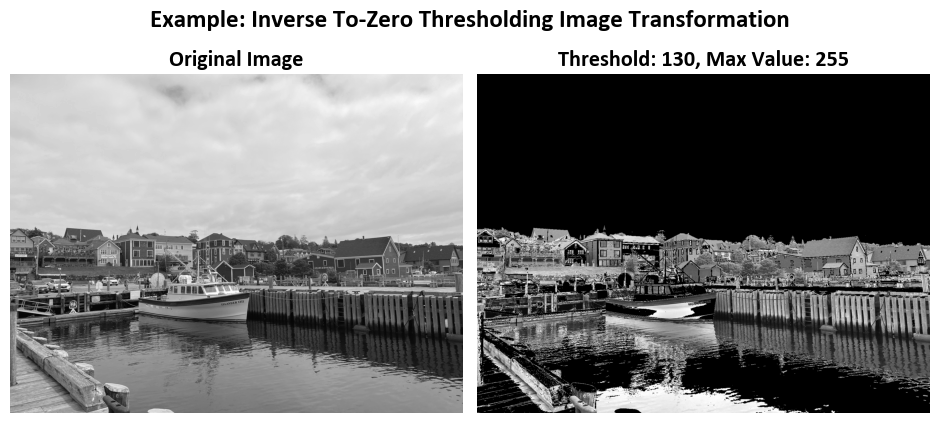

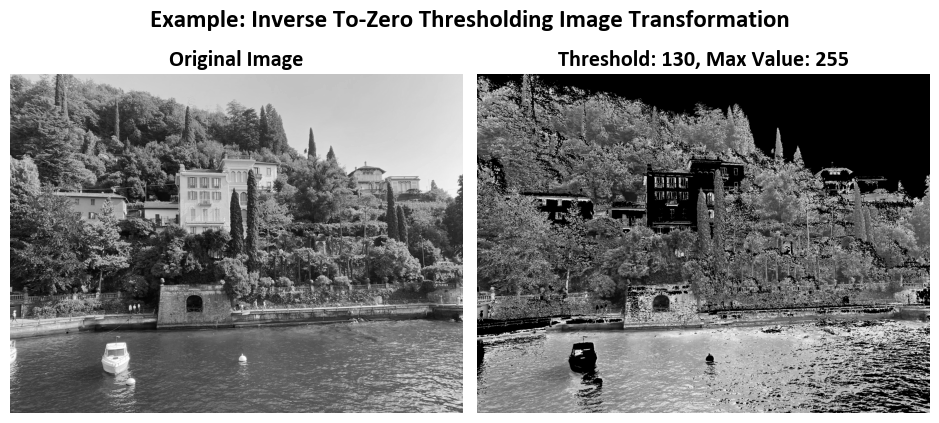

In [ ]:
import cv2
from sklearn.datasets import load_sample_image

for i in range(len(Images)):

    # Convert the color image to grayscale
    Img = cv2.cvtColor(Images[i], cv2.COLOR_BGR2GRAY)

    # Create a copy of the grayscale image
    Out = Img.copy()

    # Apply a thresholding operation to the "Img" image
    # Set the threshold value to 130
    # Set the maximum value after thresholding to 255
    # Use cv2.THRESH_TOZERO_INV as the thresholding type
    # Store the result in the "Out" image
    _ , Out = cv2.threshold(Img, thresh=130, maxval=255, type=cv2.THRESH_TOZERO_INV)

    # Show both the original "Img" image and the thresholded "Out" image
    # Add titles to the images for clarity
    fig, ax = ImShow([Img, Out], ['Original Image', 'Threshold: 130, Max Value: 255'],
                     title='Example: Inverse To-Zero Thresholding Image Transformation', grayscale=True)
